In [1]:
# Import the dependencies and time library and the datetime module from the datetime library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=178592829b27558b8a6b5081cc2a3f7c


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

74.98000010285492 69.88027730192763
-88.50846057804338 -174.90275403578934
5.8843160613995735 -167.07516248149452
-45.23392048396232 7.855836577375385
-21.488908092359495 64.26327226432909
-59.0573170153633 39.35475132656401
-43.9489517058886 141.3993172776298
3.0350273754799844 7.4707247219627675
73.31028279057116 34.639277707610546
35.30245753023783 153.5955500021929
-66.74678966216322 150.85523689687773
-5.144858284899897 13.925565100144269
46.353010002340255 155.47989436075494
-40.46101044144153 -0.1699865362133437
49.927425063440296 86.70868846158743
20.6569618853232 151.154334914829
-11.171833742661534 -171.78203940546393
-79.9951184831424 -4.616052049991993
-53.613243869414475 20.681156509552466
13.511377861520842 -15.862425755189264
-67.42140465632072 46.734762528640346
1.850347906147661 42.10670513067308
66.98566779371728 22.522357817099703
33.6400083620437 -26.69657997709109
68.56533573317725 -112.30917142328352
-41.96822786476284 62.863204409257065
7.605713853589279 173.5798

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | yar-sale
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | makakilo city
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | burnie
Processing Record 8 of Set 1 | luba
Processing Record 9 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | matadi
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | onguday
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | saleaula
City not found. Skipping...
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | kerewan
Processing Record 21 of Set 1 | dujuma
City not found. S

Processing Record 37 of Set 4 | ushibuka
Processing Record 38 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 39 of Set 4 | floro
Processing Record 40 of Set 4 | krasnoselkup
Processing Record 41 of Set 4 | ozark
Processing Record 42 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 43 of Set 4 | uusikaupunki
Processing Record 44 of Set 4 | rorvik
Processing Record 45 of Set 4 | vanavara
Processing Record 46 of Set 4 | egvekinot
Processing Record 47 of Set 4 | qaanaaq
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 50 of Set 4 | naze
Processing Record 1 of Set 5 | port antonio
Processing Record 2 of Set 5 | sehithwa
Processing Record 3 of Set 5 | totness
Processing Record 4 of Set 5 | meulaboh
Processing Record 5 of Set 5 | lethem
Processing Record 6 of Set 5 | fare
Processing Record 7 of Set 5 | manta
Processing Record 8 of Set 5 | nha trang
Processing Re

Processing Record 26 of Set 8 | toulepleu
City not found. Skipping...
Processing Record 27 of Set 8 | bima
Processing Record 28 of Set 8 | nehe
Processing Record 29 of Set 8 | great falls
Processing Record 30 of Set 8 | mae hong son
Processing Record 31 of Set 8 | kaitangata
Processing Record 32 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 33 of Set 8 | conceicao do araguaia
Processing Record 34 of Set 8 | kargil
Processing Record 35 of Set 8 | temaraia
City not found. Skipping...
Processing Record 36 of Set 8 | guerrero negro
Processing Record 37 of Set 8 | henties bay
Processing Record 38 of Set 8 | san cristobal
Processing Record 39 of Set 8 | ozgon
City not found. Skipping...
Processing Record 40 of Set 8 | srandakan
Processing Record 41 of Set 8 | thai binh
Processing Record 42 of Set 8 | medicine hat
Processing Record 43 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 44 of Set 8 | vila velha
Processing Record 45 of Set 8 | bani wa

KeyboardInterrupt: 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yar-Sale,66.8333,70.8333,-9.62,95,86,8.30,RU,2022-12-21 17:41:24
1,Vaini,-21.2000,-175.2000,73.56,100,40,2.30,TO,2022-12-21 17:41:25
2,Makakilo City,21.3469,-158.0858,68.99,84,75,6.91,US,2022-12-21 17:41:26
3,Cape Town,-33.9258,18.4232,77.41,59,0,8.05,ZA,2022-12-21 17:40:18
4,Port Alfred,-33.5906,26.8910,70.18,75,56,5.99,ZA,2022-12-21 17:41:28
5,Burnie,-41.0667,145.9167,55.94,79,100,9.78,AU,2022-12-21 17:41:28
6,Luba,3.4568,8.5547,80.33,79,92,7.05,GQ,2022-12-21 17:41:29
7,Hobart,-42.8794,147.3294,52.05,88,84,5.75,AU,2022-12-21 17:37:50
8,Matadi,-5.8167,13.4500,79.48,76,58,4.23,CD,2022-12-21 17:41:30
9,Severo-Kurilsk,50.6789,156.1250,32.77,95,94,32.12,RU,2022-12-21 17:41:30


In [12]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yar-Sale,RU,2022-12-21 17:41:24,66.8333,70.8333,-9.62,95,86,8.30
1,Vaini,TO,2022-12-21 17:41:25,-21.2000,-175.2000,73.56,100,40,2.30
2,Makakilo City,US,2022-12-21 17:41:26,21.3469,-158.0858,68.99,84,75,6.91
3,Cape Town,ZA,2022-12-21 17:40:18,-33.9258,18.4232,77.41,59,0,8.05
4,Port Alfred,ZA,2022-12-21 17:41:28,-33.5906,26.8910,70.18,75,56,5.99
5,Burnie,AU,2022-12-21 17:41:28,-41.0667,145.9167,55.94,79,100,9.78
6,Luba,GQ,2022-12-21 17:41:29,3.4568,8.5547,80.33,79,92,7.05
7,Hobart,AU,2022-12-21 17:37:50,-42.8794,147.3294,52.05,88,84,5.75
8,Matadi,CD,2022-12-21 17:41:30,-5.8167,13.4500,79.48,76,58,4.23
9,Severo-Kurilsk,RU,2022-12-21 17:41:30,50.6789,156.1250,32.77,95,94,32.12


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

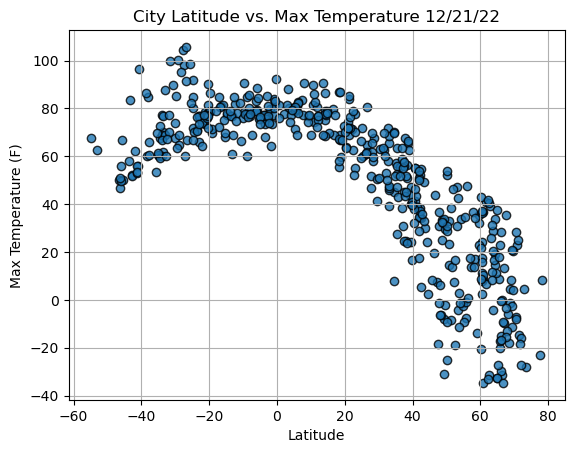

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

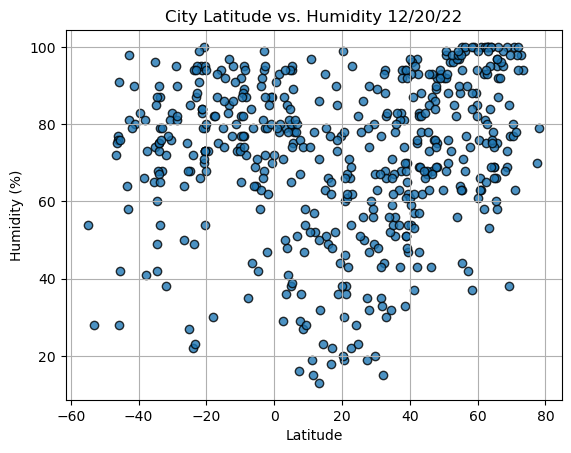

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

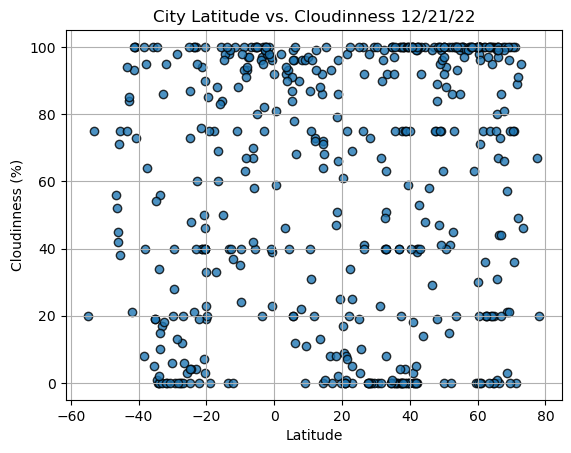

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudinness "+ time.strftime("%x"))
plt.ylabel("Cloudinness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

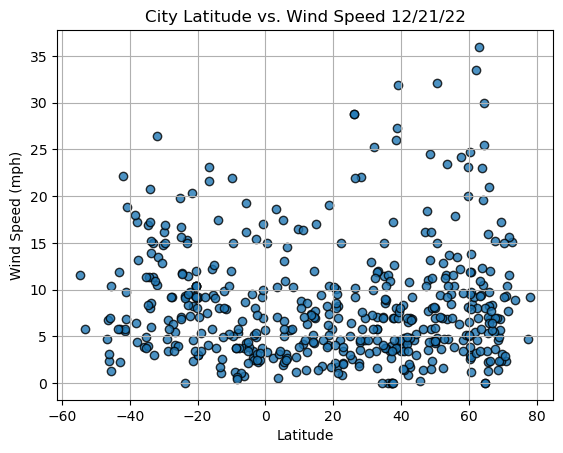

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()    

In [25]:
index13 = city_data_df.loc[13]
index13

City                     Hermanus
Country                        ZA
Date          2022-12-21 17:41:32
Lat                      -34.4187
Lng                       19.2345
Max Temp                    72.81
Humidity                       67
Cloudiness                      0
Wind Speed                  11.34
Name: 13, dtype: object

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yar-Sale,RU,2022-12-21 17:41:24,66.8333,70.8333,-9.62,95,86,8.30
2,Makakilo City,US,2022-12-21 17:41:26,21.3469,-158.0858,68.99,84,75,6.91
6,Luba,GQ,2022-12-21 17:41:29,3.4568,8.5547,80.33,79,92,7.05
9,Severo-Kurilsk,RU,2022-12-21 17:41:30,50.6789,156.1250,32.77,95,94,32.12
11,Onguday,RU,2022-12-21 17:41:31,50.7500,86.1500,14.72,90,88,4.85


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

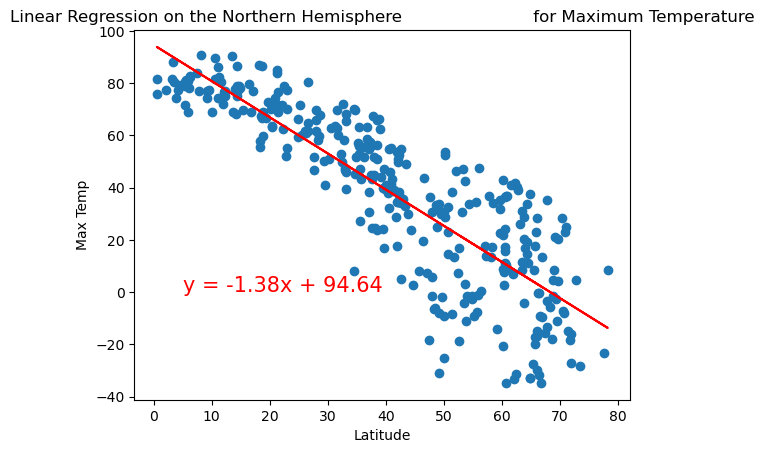

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,0))

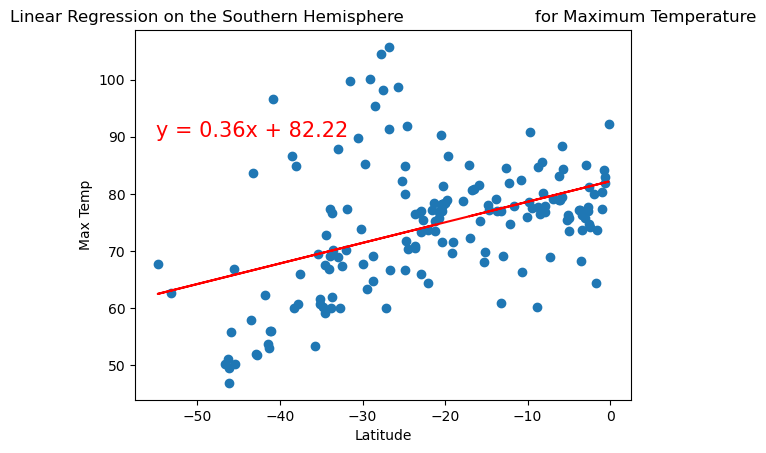

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,90))

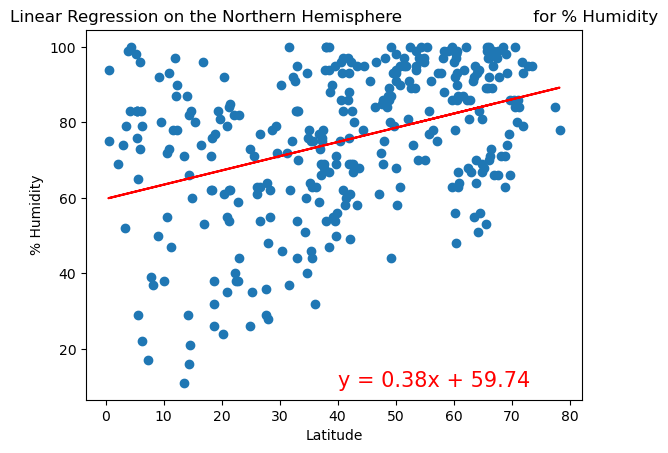

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

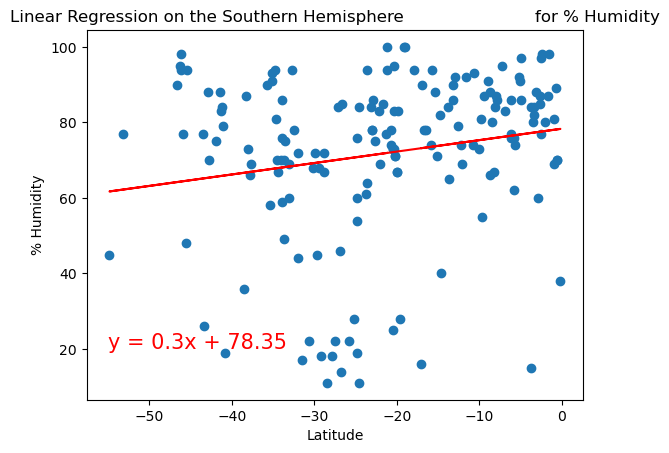

In [43]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,20))

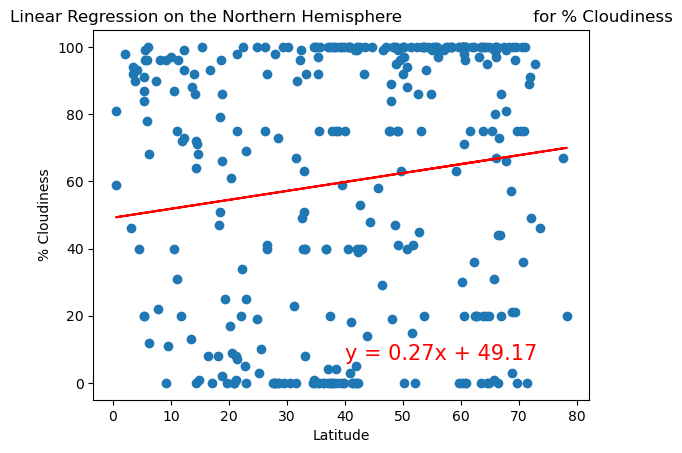

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,7))

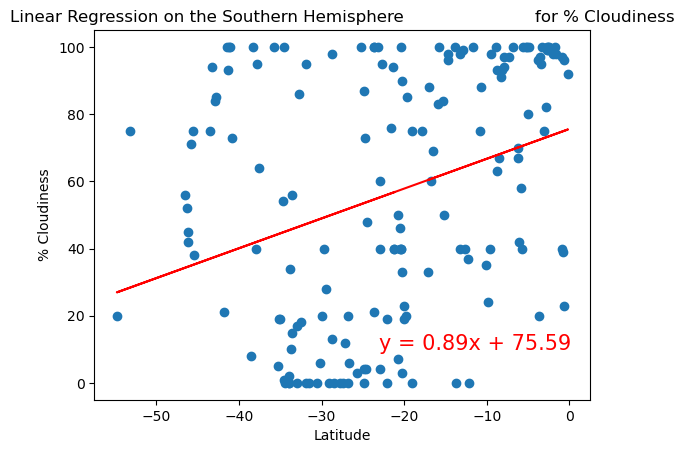

In [52]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-23,10))

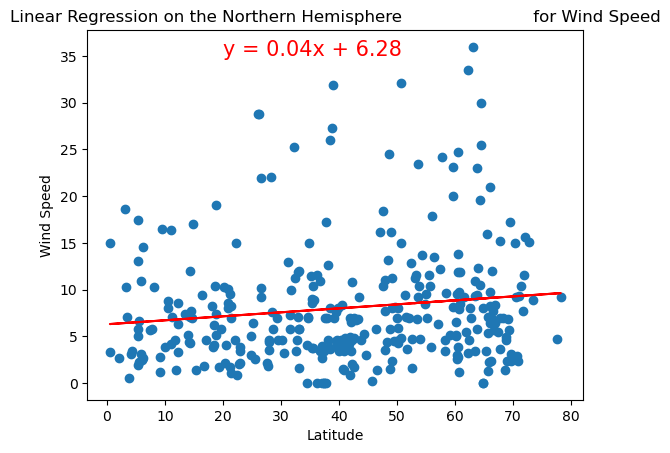

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,35))

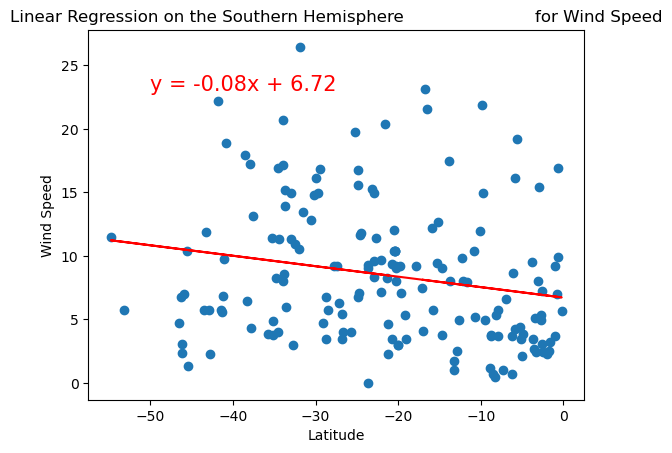

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,23))